In [16]:
# ---- Reproducibility
import random
import torch

seed = 1234
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)


In [17]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.0369924  0.12349849 0.01266485 ... 0.20919041 0.20178125 0.15269329]
 [0.01256629 0.04195233 0.00430224 ... 0.0710618  0.06854491 0.05186978]
 [0.07442166 0.24845541 0.02547927 ... 0.42085123 0.40594542 0.3071898 ]
 ...
 [0.13003676 0.43412546 0.04451985 ... 0.73535219 0.70930731 0.53675188]
 [0.02568535 0.08575008 0.00879373 ... 0.14524951 0.14010503 0.10602124]
 [0.01213768 0.04052142 0.0041555  ... 0.06863803 0.06620699 0.05010061]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.14788041  0.16955928  0.1824038  ...  0.06284919  0.26615598
   0.04153663]
 [-0.07975735  0.07738678 -0.06536086 ...  0.08710195  0.01799688
   0.10035783]
 [ 0.15693369  0.13496091 -0.12057474 ...  0.40187727  0.53974668
   0.3314774 ]
 ...
 [ 0.16086152  0.64130937  0.12866035 ...  0.67670073  0.59595961
   0.57849158]
 [-0.06675871 -0.03323521 -0.03429034 ...  0.1487228   0.2078188
   0.18898802]
 [-0.14480705  0.07884231  0.03359961 ... -0.16932926  0.1779711
   0.1486

In [18]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [19]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="exp",
                prior_L="exp") 

 

In [20]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([ 0.0080, -0.1905,  0.2605, -0.2120,  0.2116,  0.1896, -0.2458, -0.2640,
         0.1057,  0.1225,  0.0676,  0.0620, -0.0016,  0.1750,  0.1087, -0.0761,
         0.1078, -0.4832,  0.0641,  0.1960, -0.2287, -0.0704, -0.2441,  0.0377,
        -0.2611, -0.1291,  0.3901, -0.0387, -0.1331, -0.2875, -0.2095,  0.1439,
        -0.0307, -0.0648,  0.0598, -0.0430,  0.1896,  0.1109,  0.0643, -0.0023,
        -0.0328, -0.2137,  0.0720,  0.0039, -0.1591, -0.2714, -0.0136,  0.1367,
         0.0542,  0.2452])
tensor([ 0.0610,  0.0381, -0.0373,  0.1844, -0.0388, -0.1764,  0.0488, -0.3281,
        -0.0793,  0.0009,  0.2299,  0.1970,  0.0735, -0.2066,  0.0725, -0.2878,
        -0.0727,  0.3067, -0.2505,  0.0539,  0.1928,  0.0201, -0.0158,  0.1157,
         0.1509,  0.0815,  0.0377,  0.1380,  0.1188, -0.1703, -0.0225, -0.0766,
        -0.2759,  0.2154,  0.2396, -0.1764, -0.0045, -0.1609,  0.1603,  0.0669])


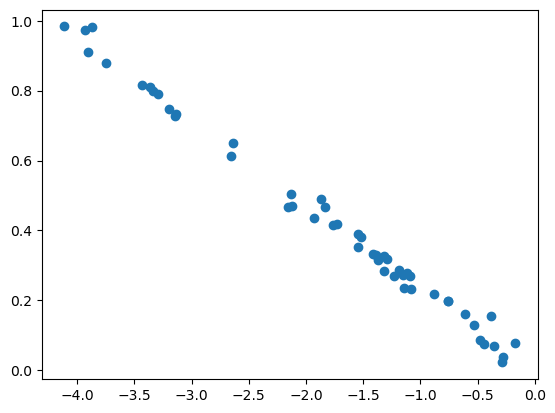

In [21]:
plt.scatter( mycebmf.L[:,0],u)

In [22]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

Converged after 13 iterations.
Converged after 53 iterations.
5


tensor([[0.0239, 0.0669, 0.0068,  ..., 0.0740, 0.0797, 0.0510],
        [0.0033, 0.0198, 0.0019,  ..., 0.0220, 0.0261, 0.0239],
        [0.0107, 0.0480, 0.0035,  ..., 0.0635, 0.0848, 0.0634],
        ...,
        [0.0121, 0.0337, 0.0032,  ..., 0.0397, 0.0446, 0.0276],
        [0.0065, 0.0443, 0.0048,  ..., 0.0558, 0.0636, 0.0567],
        [0.0193, 0.1199, 0.0102,  ..., 0.1378, 0.1765, 0.1561]])

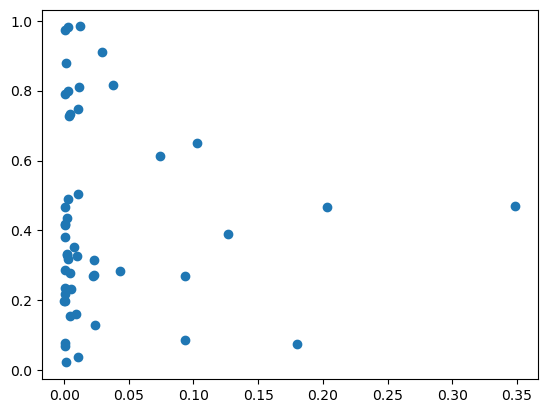

In [23]:
plt.scatter( mycebmf.L[:,0],u)

2


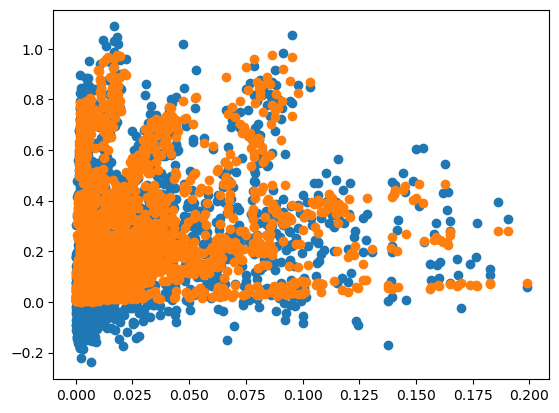

In [36]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [37]:
mycebmf.fit()

Converged after 12 iterations.
Converged after 53 iterations.
2


CEBMFResult(L=tensor([[0.1541],
        [0.0439],
        [0.3504],
        [0.2789],
        [0.2392],
        [0.1813],
        [0.1033],
        [0.1659],
        [0.1559],
        [0.6607],
        [0.5647],
        [0.0519],
        [0.5242],
        [0.4389],
        [0.1667],
        [0.2116],
        [0.2084],
        [0.1031],
        [0.5360],
        [0.4355],
        [0.1731],
        [0.2153],
        [0.2351],
        [0.2395],
        [0.0576],
        [0.0522],
        [0.3438],
        [0.1917],
        [0.6339],
        [0.2941],
        [0.6659],
        [0.1968],
        [0.5603],
        [0.3099],
        [0.1967],
        [0.6540],
        [0.0690],
        [0.0746],
        [0.3453],
        [0.1616],
        [0.2993],
        [0.2745],
        [0.6972],
        [0.0600],
        [0.5532],
        [0.1208],
        [0.5263],
        [0.5761],
        [0.0835],
        [0.0654]]), F=tensor([[0.0688],
        [0.3376],
        [0.0357],
        [0.5003],
        [0

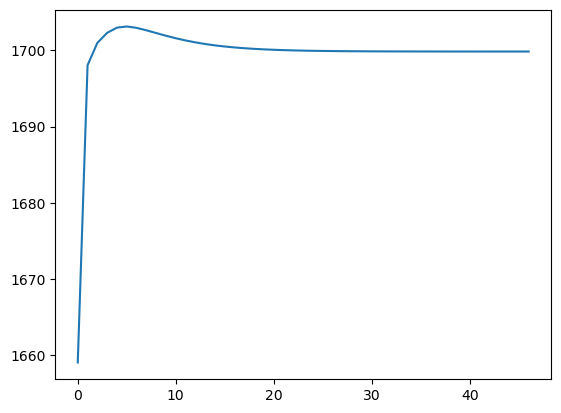

In [11]:
plt.plot(mycebmf.obj)

tensor(0.2308, dtype=torch.float64)

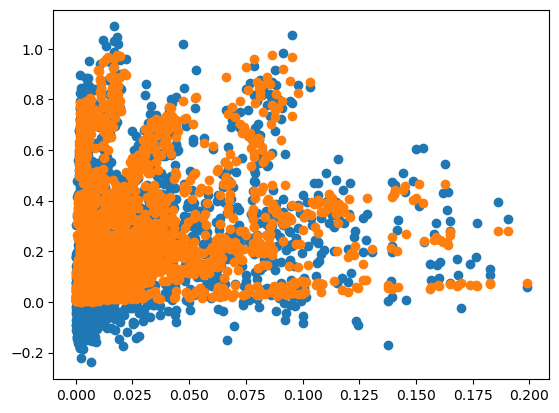

In [12]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [13]:
results =[]
for i in range(200):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix, prior_F="exp", prior_L="exp") 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

Converged after 14 iterations.
Converged after 53 iterations.
5
4
4
Converged after 74 iterations.
4
Converged after 53 iterations.
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
Converged after 14 iterations.
Converged after 53 iterations.
5
4
Converged after 90 iterations.
Converged after 53 iterations.
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
Converged after 13 iterations.
Converged after 53 iterations.
5
4
4
4
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
Converged after 56 iterations.
Converged after 56 iterations.
Converged after 56 iterations.
Converged after 56 iterations.
5
Converged after 11 iterations.
Converged after 53 iterations.
5
4
4
4
4
Converged after 66 iterations.
Converged after 53 iterations.
Converged after 55 iterations.
4
2
2
2
Converged after 59 iterations.
2
Converged after 14 iterations.
Converged after 53 iteratio

KeyboardInterrupt: 

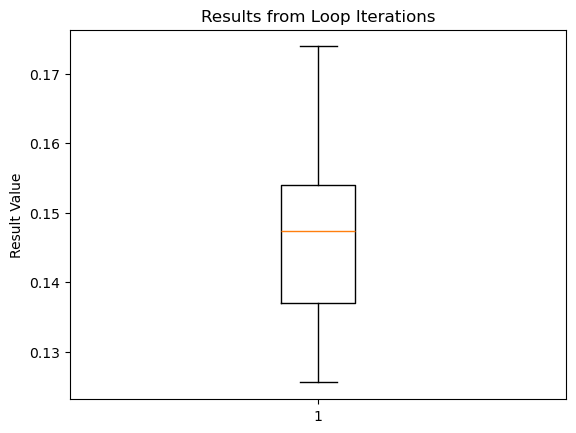

In [14]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [15]:
res= np.asarray(results)
np.mean(res )

np.float64(0.14696868727634402)

In [ ]:
0.1474302336345511